In [1]:
%matplotlib inline
from utils import *
import matplotlib.colors as mcolors

## A - sampled signal at different freqs.

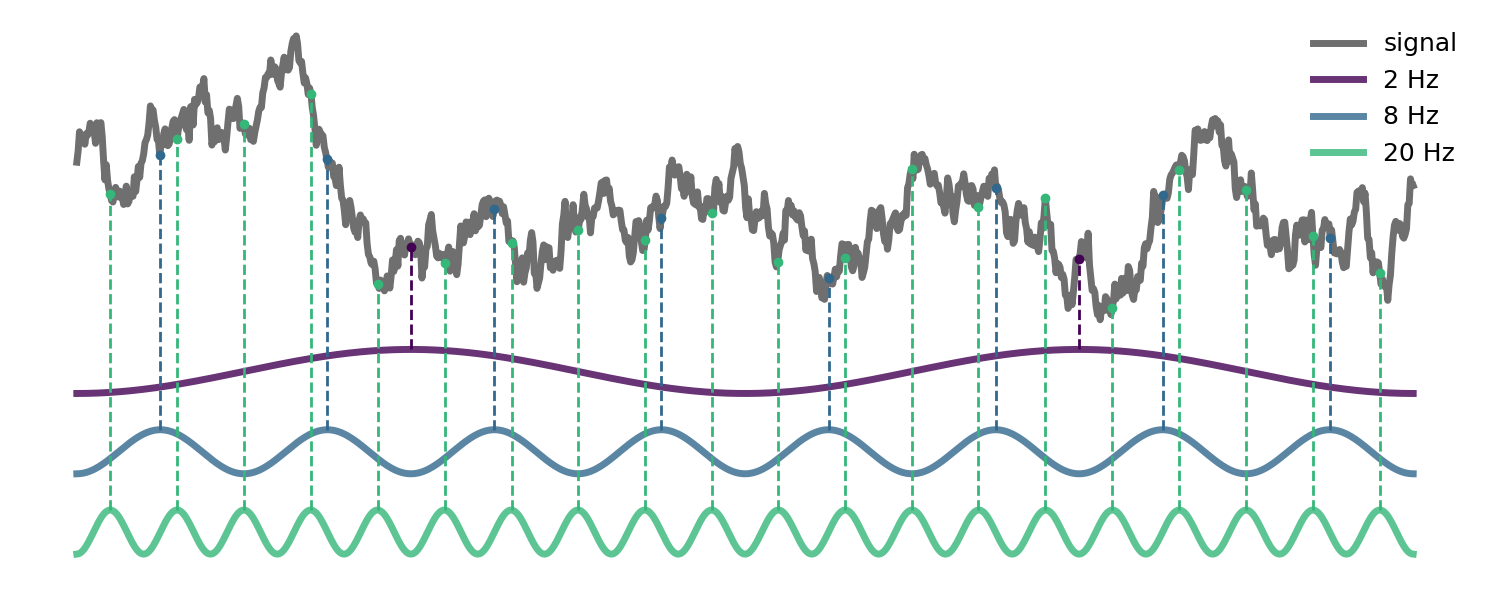

In [55]:
# Parameters
time_constant = 0.1  # 100 ms
sampling_rate = 1000  # 1000 Hz, i.e., 1 ms per sample
duration = 1  # 1 second
n_samples = duration * sampling_rate
frequencies = [2, 8, 20]
offset = -np.pi

# Time vector
t = np.linspace(0, duration, n_samples)

# Generate white noise
white_noise = np.random.randn(n_samples)

# Create the filter
alpha = np.exp(-1 / (time_constant * sampling_rate))
filtered_signal = np.zeros_like(white_noise)
filtered_signal[0] = white_noise[0]

# Apply the exponential filter
for i in range(1, n_samples):
    filtered_signal[i] = alpha * filtered_signal[i-1] + white_noise[i]

# Generate the cosine waves with increased amplitude
amplitude_scale = np.std(filtered_signal) * 0.4
cosine_waves = [amplitude_scale * np.cos(2 * np.pi * freq * t + offset) for freq in frequencies]

# Plot settings
plt.figure(figsize=(15, 6))
#colors = cm.viridis(np.linspace(0, 1, 50))[(np.array(frequencies)-1)*2]
colors = cm.viridis(np.linspace(0, 1, 4))[:3]
modern_colors = ['#4B4B4B'] + colors.tolist()#, '#e76f51', '#f4a261', '#264653']

offsets = [0, -20, -28, -36]  # Offsets for y-axis

# Plot the main signal
plt.plot(t, filtered_signal + offsets[0], color=modern_colors[0], label='signal', linewidth=5, alpha=0.8)

# Plot the cosine waves and vertical lines at peaks
for i, (freq, cosine_wave) in enumerate(zip(frequencies, cosine_waves)):
    offset_wave = cosine_wave + offsets[i + 1]
    plt.plot(t, offset_wave, color=modern_colors[i + 1], label=f'{freq} Hz', linewidth=5, alpha=0.8)
    
    peaks = np.where((cosine_wave[1:-1] > cosine_wave[:-2]) & (cosine_wave[1:-1] > cosine_wave[2:]))[0] + 1
    for peak in peaks:
        # Find intersection
        intersection_idx = peak
        intersection_time = t[intersection_idx]
        intersection_value = filtered_signal[intersection_idx] + offsets[0]
        
        # Draw dashed line and intersection dot
        plt.plot([intersection_time, intersection_time], [offset_wave[peak], intersection_value], color=modern_colors[i + 1], linestyle='--', linewidth=2)
        plt.plot(intersection_time, intersection_value, 'o', color=modern_colors[i + 1])

# Aesthetic settings
plt.xlabel('Time (s)', fontsize=16, weight='bold')
plt.ylabel('Amplitude', fontsize=16, weight='bold')
plt.xticks(fontsize=14, weight='bold')
plt.yticks(fontsize=14, weight='bold')
plt.legend(fontsize=18, frameon=False)
plt.grid(True)
sb.despine()
plt.axis('off')
plt.tight_layout()
plt.savefig('plots/fig5/sampling_signal.svg', dpi=600)
plt.show()

## B - oversampling correcting factor

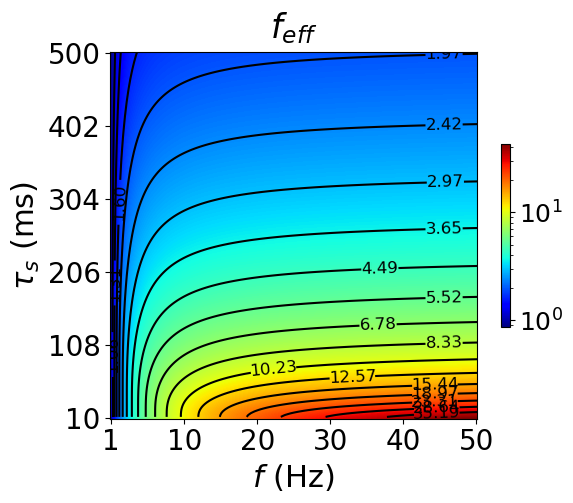

In [4]:
res = 200

fs = np.linspace(1, 50, res)
taus_s = np.linspace(10, 500, res) * 1e-3
F, T = np.meshgrid(fs, taus_s)
exp_func = F * (1 - np.exp(-(1/F)/T))

# Determine the color scale range for each dataset in log space
vmin = exp_func[exp_func > 0].min()
vmax = exp_func.max()

# Define contour levels for each dataset in the original scale
num_contours = 20
contour_levels = np.logspace(np.log10(vmin), np.log10(vmax), num=num_contours)
#contour_levels = np.linspace(0, 1, num=num_contours)**2 * (vmax - vmin) + vmin

plt.figure(figsize=(6, 5))

# Plot for the Numerical data
norm_num = mcolors.LogNorm(vmin=vmin, vmax=vmax)
img = plt.imshow(exp_func, origin='lower', cmap='jet', norm=norm_num, interpolation='lanczos')
#img = plt.imshow(exp_func, origin='lower', cmap='jet', interpolation='lanczos')
contours = plt.contour(exp_func, levels=contour_levels, colors='black', linewidths=1.5, origin='lower')
plt.clabel(contours, inline=True, fontsize=12, fmt='%1.2f')  # Adding labels to contours
plt.xticks(np.linspace(0, res-1, 6), np.linspace(1, 50, 6).astype(int), fontsize=20)
plt.yticks(np.linspace(0, res-1, 6), np.linspace(10, 500, 6).astype(int), fontsize=20)
plt.xlabel('$f$ (Hz)', fontsize=22)
plt.ylabel(r'$\tau_s$ (ms)', fontsize=22)
#plt.title(r'$(1-e^{-T/\tau_s})f$', fontsize=24, pad=10)
plt.title(r'$f_{eff}$', fontsize=24, pad=10)
cbar = plt.colorbar(img, shrink=.5)
#cbar.set_label(r'$1-e^{-T/\tau_s}$', fontsize=18)
cbar.ax.tick_params(labelsize=18)  # Increase colorbar tick fontsize

plt.tight_layout()

# Save the figure
plt.savefig('plots/fig5/B_corr_factor.svg', dpi=600)

# Show the plot
plt.show()